<a href="https://colab.research.google.com/github/horcruxxxx/397---REACT_JSX/blob/main/Microstructure_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras.backend as K
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def load_dataset():
    train_dataset = h5py.File('MSData.hdf5', "r")
    train_set_x_orig = np.array(train_dataset["train_img"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_labels"][:]) # your train set labels

    test_dataset = h5py.File('MSData.hdf5', "r")
    test_set_x_orig = np.array(test_dataset["test_img"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_labels"][:]) # your test set labels

    classes = np.array(test_dataset["val_labels"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from data1 import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 360
number of test examples = 80
X_train shape: (360, 256, 256, 3)
Y_train shape: (360, 1)
X_test shape: (80, 256, 256, 3)
Y_test shape: (80, 1)


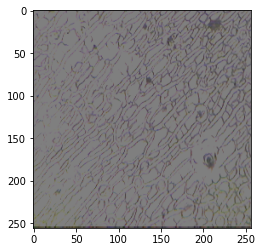

In [6]:
index = 5
plt.imshow(X_train_orig[index])

In [7]:
def MsModel(input_shape):

    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (2, 2), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool')(X)
    
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((4, 4), name='max_pool1')(X)
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((4, 4), name='max_pool2')(X)
    
   

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. 
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

In [8]:
msModel = MsModel((256,256,3))


In [9]:
msModel.compile(loss='mean_squared_error', optimizer='Adam', metrics = ["accuracy"])


In [10]:
msModel.fit(x=X_train, y = Y_train, epochs = 30 , batch_size = 12)


Epoch 1/30
30/30 [==============================] - 13s 405ms/step - loss: 0.1913 - accuracy: 0.7056
Epoch 2/30
30/30 [==============================] - 12s 406ms/step - loss: 0.1275 - accuracy: 0.8389
Epoch 3/30
30/30 [==============================] - 12s 409ms/step - loss: 0.0992 - accuracy: 0.8833
Epoch 4/30
30/30 [==============================] - 12s 410ms/step - loss: 0.0823 - accuracy: 0.8944
Epoch 5/30
30/30 [==============================] - 12s 385ms/step - loss: 0.0761 - accuracy: 0.9306
Epoch 6/30
30/30 [==============================] - 12s 394ms/step - loss: 0.0598 - accuracy: 0.9361
Epoch 7/30
30/30 [==============================] - 13s 434ms/step - loss: 0.0495 - accuracy: 0.9500
Epoch 8/30
30/30 [==============================] - 12s 405ms/step - loss: 0.0677 - accuracy: 0.9250
Epoch 9/30
30/30 [==============================] - 12s 389ms/step - loss: 0.0612 - accuracy: 0.9417
Epoch 10/30
30/30 [==============================] - 12s 398ms/step - loss: 0.0388 - accura

In [11]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot_ng
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from data1 import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline
from keras.models import load_model
model = load_model('msmodel.h5')

In [12]:
from tensorflow.keras.utils import load_img, img_to_array

1/1 [==============================] - 0s 244ms/step
[[0.]]
Its non dendritic


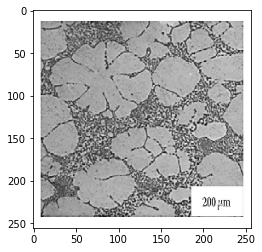

In [13]:
img_path = 'NonDendrictic.jpg'

img = load_img(img_path, target_size=(256, 256))
imshow(img)

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
p = model.predict(x)
print(p)
if (p == 1):
    print("Its dendritic")
else:
    print("Its non dendritic")

1/1 [==============================] - 0s 103ms/step
[[1.]]
Its dendritic


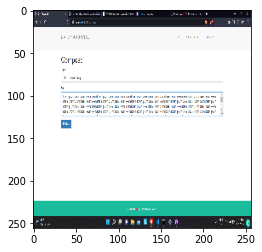

In [14]:
img_path = 'temp.jpg'

img = load_img(img_path, target_size=(256, 256))
imshow(img)

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
p = model.predict(x)
print(p)
if (p == 1):
    print("Its dendritic")
else:
    print("Its non dendritic")